In [42]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [43]:
x=df.iloc[:,0:2].values
x
y=df.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [44]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,0]=lb.fit_transform(x[:,0])
x[:,0]

array([0, 4, 8, 5, 3, 7, 6, 9, 1, 2], dtype=object)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train
y_train

array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
        150000], dtype=int64)

In [46]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit (x_train, y_train ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
predictValues = LR.predict(x_test)
x_test
print(y_test)
predictValues


[ 60000 500000]


array([-230043.99247013,  848568.50548371])

In [48]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
predictValues = LR.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,predictValues)))

320644.289348


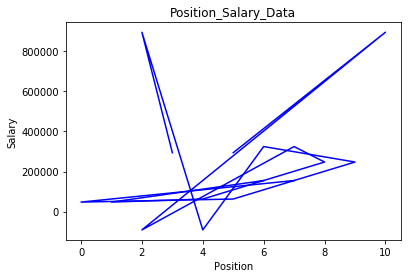

In [64]:
plt.plot(x_train,LR.predict(x_train),color='blue')
plt.title('Position_Salary_Data')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [65]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
iv_poly = poly_reg.fit_transform(x_train)
#print(iv_poly)


In [51]:
poly_reg.fit(iv_poly, y_train)
#predictValues = poly_reg.predict(x_test)   
#print(predictValues)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg_2 = LinearRegression()
lin_reg_2.fit(iv_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
xtest_poly = poly_reg.fit_transform(x_test)
print(xtest_poly)

[[  1.00000000e+00   8.00000000e+00   3.00000000e+00   6.40000000e+01
    2.40000000e+01   9.00000000e+00   5.12000000e+02   1.92000000e+02
    7.20000000e+01   2.70000000e+01   4.09600000e+03   1.53600000e+03
    5.76000000e+02   2.16000000e+02   8.10000000e+01]
 [  1.00000000e+00   1.00000000e+00   9.00000000e+00   1.00000000e+00
    9.00000000e+00   8.10000000e+01   1.00000000e+00   9.00000000e+00
    8.10000000e+01   7.29000000e+02   1.00000000e+00   9.00000000e+00
    8.10000000e+01   7.29000000e+02   6.56100000e+03]]


In [56]:
lin_reg_3=LinearRegression()
lin_reg_3.fit(xtest_poly, x_test)
predictValues = lin_reg_3.predict(xtest_poly)
print(predictValues)


[[ 8.  3.]
 [ 1.  9.]]


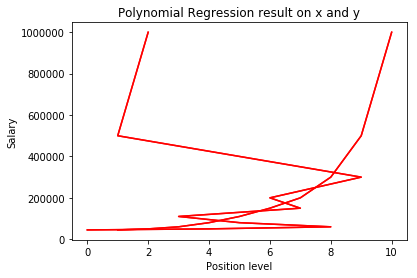

In [59]:
plt.plot(x, y, color = 'red')

plt.title('Polynomial Regression result on x and y')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
